#📌 Extracción

In [ ]:
import pandas as pd
import json
import requests

# 1. Cargar los datos desde la URL
api_url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json"

try:
    response = requests.get(api_url)
    response.raise_for_status() # Lanza un error para códigos de estado HTTP incorrectos
    datos_telecom_original = response.json()
    print("Datos cargados exitosamente desde la API.")
except requests.exceptions.RequestException as e:
    print(f"Error al cargar los datos: {e}")
    raise



Datos cargados exitosamente desde la API.


#🔧 Transformación

In [ ]:
# 2. Normalizar los datos
# Usamos meta para extraer todas las claves anidadas en columnas.
top_level_keys = ['customerID', 'Churn']
nested_keys = [
    # Claves dentro de 'customer'
    ['customer', 'gender'],
    ['customer', 'SeniorCitizen'],
    ['customer', 'Partner'],
    ['customer', 'Dependents'],
    ['customer', 'tenure'],
    # Claves dentro de 'phone'
    ['phone', 'PhoneService'],
    ['phone', 'MultipleLines'],
    # Claves dentro de 'internet'
    ['internet', 'InternetService'],
    ['internet', 'OnlineSecurity'],
    ['internet', 'OnlineBackup'],
    ['internet', 'DeviceProtection'],
    ['internet', 'TechSupport'],
    ['internet', 'StreamingTV'],
    ['internet', 'StreamingMovies'],
    # Claves dentro de 'account'
    ['account', 'Contract'],
    ['account', 'PaperlessBilling'],
    ['account', 'PaymentMethod'],
    # Claves dentro de 'account.Charges' (doble anidación)
    ['account', 'Charges', 'Monthly'],
    ['account', 'Charges', 'Total']
]

# Combinamos todas las claves que queremos en el parámetro meta
all_meta_keys = top_level_keys + nested_keys

# Normalizamos los datos
df_telecom = pd.json_normalize(
    datos_telecom_original,
    meta=all_meta_keys
)

In [ ]:
# Mostrar las primeras filas del DataFrame normalizado y sus columnas
print("\nDataFrame normalizado (primeras 5 filas):")
print(df_telecom.head())
print("\nColumnas del DataFrame normalizado:")
print(df_telecom.columns)


DataFrame normalizado (primeras 5 filas):
   customerID Churn customer.gender  customer.SeniorCitizen customer.Partner  \
0  0002-ORFBO    No          Female                       0              Yes   
1  0003-MKNFE    No            Male                       0               No   
2  0004-TLHLJ   Yes            Male                       0               No   
3  0011-IGKFF   Yes            Male                       1              Yes   
4  0013-EXCHZ   Yes          Female                       1              Yes   

  customer.Dependents  customer.tenure phone.PhoneService phone.MultipleLines  \
0                 Yes                9                Yes                  No   
1                  No                9                Yes                 Yes   
2                  No                4                Yes                  No   
3                  No               13                Yes                  No   
4                  No                3                Yes              

In [ ]:
# Quitar los prefijos)
# Esto se hace después de la normalización, ya que json_normalize las crea con los prefijos.
df_telecom.columns = df_telecom.columns.str.replace('customer.', '', regex=False)
df_telecom.columns = df_telecom.columns.str.replace('phone.', '', regex=False)
df_telecom.columns = df_telecom.columns.str.replace('internet.', '', regex=False)
df_telecom.columns = df_telecom.columns.str.replace('account.', '', regex=False)
df_telecom.columns = df_telecom.columns.str.replace('Charges.', '', regex=False)


# Mostrar las primeras filas del DataFrame normalizado y sus columnas
print("\nDataFrame normalizado (primeras 5 filas):")
print(df_telecom.head())
print("\nColumnas del DataFrame normalizado:")
print(df_telecom.columns)


DataFrame normalizado (primeras 5 filas):
   customerID Churn  gender  SeniorCitizen Partner Dependents  tenure  \
0  0002-ORFBO    No  Female              0     Yes        Yes       9   
1  0003-MKNFE    No    Male              0      No         No       9   
2  0004-TLHLJ   Yes    Male              0      No         No       4   
3  0011-IGKFF   Yes    Male              1     Yes         No      13   
4  0013-EXCHZ   Yes  Female              1     Yes         No       3   

  PhoneService MultipleLines InternetService  ... OnlineBackup  \
0          Yes            No             DSL  ...          Yes   
1          Yes           Yes             DSL  ...           No   
2          Yes            No     Fiber optic  ...           No   
3          Yes            No     Fiber optic  ...          Yes   
4          Yes            No     Fiber optic  ...           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No         Yes         Yes 

In [ ]:
# columnas del dataframe normalizado
df_telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [ ]:
# tipos de columnas del dataframe normalizado
df_telecom.dtypes

,0
customerID,object
Churn,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object


#### Diccionario de datos

- `customerID`: número de identificación único de cada cliente
- `Churn`: si el cliente dejó o no la empresa
- `gender`: género (masculino y femenino)
- `SeniorCitizen`: información sobre si un cliente tiene o no una edad igual o mayor a 65 años
- `Partner`: si el cliente tiene o no una pareja
- `Dependents`: si el cliente tiene o no dependientes
- `tenure`: meses de contrato del cliente
- `PhoneService`: suscripción al servicio telefónico
- `MultipleLines`: suscripción a más de una línea telefónica
- `InternetService`: suscripción a un proveedor de internet
- `OnlineSecurity`: suscripción adicional de seguridad en línea
- `OnlineBackup`: suscripción adicional de respaldo en línea
- `DeviceProtection`: suscripción adicional de protección del dispositivo
- `TechSupport`: suscripción adicional de soporte técnico, menor tiempo de espera
- `StreamingTV`: suscripción de televisión por cable
- `StreamingMovies`: suscripción de streaming de películas
- `Contract`: tipo de contrato
- `PaperlessBilling`: si el cliente prefiere recibir la factura en línea
- `PaymentMethod`: forma de pago
- `Charges.Monthly`: total de todos los servicios del cliente por mes
- `Charges.Total`: total gastado por el cliente

La columna más relevante para predecir qué clientes se irán de la empresa y la variable principal sería:
Churn.

In [ ]:
#Identificar nulos
print("Valores nulos por columna (NaN estándar):")
print(df_telecom.isnull().sum())


Valores nulos por columna (NaN estándar):
customerID          0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Monthly             0
Total               0
dtype: int64


In [ ]:
#convertir a numericos los datos que deben ser numericos
df_telecom['Total'] = pd.to_numeric(df_telecom['Total'], errors='coerce')

print("\nValores nulos en 'Total' después de coerción:")
print(df_telecom['Total'].isnull().sum())


Valores nulos en 'Total' después de coerción:
11


In [ ]:
print("\nFilas con valores nulos en 'Total' (después de coerción):")
print(df_telecom[df_telecom['Total'].isnull()])


Filas con valores nulos en 'Total' (después de coerción):
      customerID Churn  gender  SeniorCitizen Partner Dependents  tenure  \
975   1371-DWPAZ    No  Female              0     Yes        Yes       0   
1775  2520-SGTTA    No  Female              0     Yes        Yes       0   
1955  2775-SEFEE    No    Male              0      No        Yes       0   
2075  2923-ARZLG    No    Male              0     Yes        Yes       0   
2232  3115-CZMZD    No    Male              0      No        Yes       0   
2308  3213-VVOLG    No    Male              0     Yes        Yes       0   
2930  4075-WKNIU    No  Female              0     Yes        Yes       0   
3134  4367-NUYAO    No    Male              0     Yes        Yes       0   
3203  4472-LVYGI    No  Female              0     Yes        Yes       0   
4169  5709-LVOEQ    No  Female              0     Yes        Yes       0   
5599  7644-OMVMY    No    Male              0     Yes        Yes       0   

     PhoneService     Multip

In [ ]:
df_telecom['Total'].fillna(0, inplace=True)
print("\nDespués de imputar nulos en 'Total':")
print(df_telecom['Total'].isnull().sum())


Después de imputar nulos en 'Total':
0


<ipython-input-62-4015292388>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_telecom['Total'].fillna(0, inplace=True)


In [ ]:
df_telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [ ]:
#identificar duplicados
print(f"\nNúmero de filas duplicadas: {df_telecom.duplicated().sum()}")


Número de filas duplicadas: 0


In [ ]:
#revisando valores unicos
print("\nRevisando valores únicos en columnas categóricas:")
for col in df_telecom.select_dtypes(include='object').columns:
        if col not in ['customerID', 'Churn']:
           print(f"\nColumna: {col}")
           print(df_telecom[col].value_counts())


Revisando valores únicos en columnas categóricas:

Columna: gender
gender
Male      3675
Female    3592
Name: count, dtype: int64

Columna: Partner
Partner
No     3749
Yes    3518
Name: count, dtype: int64

Columna: Dependents
Dependents
No     5086
Yes    2181
Name: count, dtype: int64

Columna: PhoneService
PhoneService
Yes    6560
No      707
Name: count, dtype: int64

Columna: MultipleLines
MultipleLines
No                  3495
Yes                 3065
No phone service     707
Name: count, dtype: int64

Columna: InternetService
InternetService
Fiber optic    3198
DSL            2488
No             1581
Name: count, dtype: int64

Columna: OnlineSecurity
OnlineSecurity
No                     3608
Yes                    2078
No internet service    1581
Name: count, dtype: int64

Columna: OnlineBackup
OnlineBackup
No                     3182
Yes                    2504
No internet service    1581
Name: count, dtype: int64

Columna: DeviceProtection
DeviceProtection
No                

In [ ]:
#revisando valores unicos
print(f"\nValores únicos en 'Churn': {df_telecom['Churn'].unique()}")


Valores únicos en 'Churn': ['No' 'Yes' '']


In [ ]:
registros_churn_vacios = df_telecom[df_telecom['Churn'] == '']
print(registros_churn_vacios)

      customerID Churn  gender  SeniorCitizen Partner Dependents  tenure  \
30    0047-ZHDTW        Female              0      No         No      11   
75    0120-YZLQA          Male              0      No         No      71   
96    0154-QYHJU          Male              0      No         No      29   
98    0162-RZGMZ        Female              1      No         No       5   
175   0274-VVQOQ          Male              1     Yes         No      65   
...          ...   ...     ...            ...     ...        ...     ...   
7158  9840-GSRFX        Female              0      No         No      14   
7180  9872-RZQQB        Female              0     Yes         No      49   
7211  9920-GNDMB          Male              0      No         No       9   
7239  9955-RVWSC        Female              0     Yes        Yes      67   
7247  9966-VYRTZ        Female              0     Yes        Yes      31   

     PhoneService     MultipleLines InternetService  ...         OnlineBackup  \
30    

In [ ]:
df_telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [ ]:
print(f"Número de registros con 'Churn' vacío antes: {len(registros_churn_vacios)}")


Número de registros con 'Churn' vacío antes: 224


In [ ]:
#Dado que la cantidad de registros nulos no es considerable se opta por reemplazarlos por 0
df_telecom['Churn'] = df_telecom['Churn'].replace('', 'No')

In [ ]:
print(f"Valores únicos en 'Churn' después de la imputación: {df_telecom['Churn'].unique()}")

Valores únicos en 'Churn' después de la imputación: ['No' 'Yes']


In [ ]:
print(f"Valores únicos  {df_telecom['tenure'].unique()}")

Valores únicos  [ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42
  0]


In [ ]:
registros_tenure_cero = df_telecom[df_telecom['tenure'] == 0]
print(registros_tenure_cero)

      customerID Churn  gender  SeniorCitizen Partner Dependents  tenure  \
975   1371-DWPAZ    No  Female              0     Yes        Yes       0   
1775  2520-SGTTA    No  Female              0     Yes        Yes       0   
1955  2775-SEFEE    No    Male              0      No        Yes       0   
2075  2923-ARZLG    No    Male              0     Yes        Yes       0   
2232  3115-CZMZD    No    Male              0      No        Yes       0   
2308  3213-VVOLG    No    Male              0     Yes        Yes       0   
2930  4075-WKNIU    No  Female              0     Yes        Yes       0   
3134  4367-NUYAO    No    Male              0     Yes        Yes       0   
3203  4472-LVYGI    No  Female              0     Yes        Yes       0   
4169  5709-LVOEQ    No  Female              0     Yes        Yes       0   
5599  7644-OMVMY    No    Male              0     Yes        Yes       0   

     PhoneService     MultipleLines InternetService  ...         OnlineBackup  \
975   

In [ ]:
df_telecom['Churn'].value_counts()

,count
Churn,
No,5398
Yes,1869


<Axes: xlabel='Churn'>

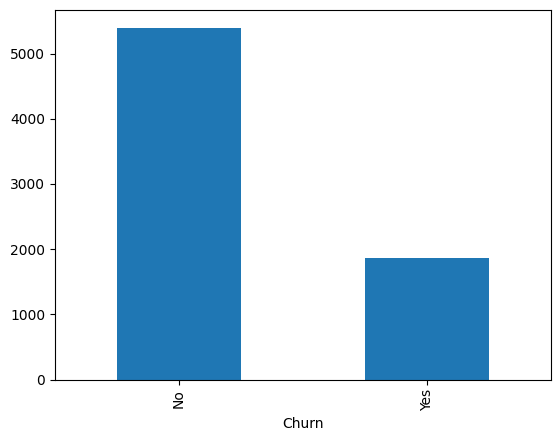

In [ ]:
df_telecom['Churn'].value_counts().plot(kind='bar')

In [ ]:
#Crear columna de cuentas diarias a partir de la facturacion mensual
df_telecom['Cuentas_Diarias'] = df_telecom['Monthly'] / 30

In [ ]:
df_telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [ ]:
df_telecom['Churn'] = df_telecom['Churn'].map({'Yes': 1, 'No': 0})

In [ ]:
df_telecom['gender'] = df_telecom['gender'].map({'Female': 0, 'Male': 1})

In [ ]:
print(f"\nValores únicos en 'Churn': {df_telecom['Churn'].unique()}")


Valores únicos en 'Churn': [0 1]


Churn = si el cliente dejó o no la empresa
Churn --> yes = 1
Churn --> No = 0

gender --> Female = 0
gender --> Male  = 1

In [ ]:
print(f"\nColumna: {'Churn'}")
print(df_telecom['Churn'].value_counts())


Columna: Churn
Churn
0    5398
1    1869
Name: count, dtype: int64


In [ ]:
print("Valores únicos en 'Partner' antes de la conversión:")
print(df_telecom['Partner'].unique())
print("\nConteo de valores antes:")
print(df_telecom['Partner'].value_counts())

Valores únicos en 'Partner' antes de la conversión:
['Yes' 'No']

Conteo de valores antes:
Partner
No     3749
Yes    3518
Name: count, dtype: int64


In [ ]:
df_telecom['Partner'] = df_telecom['Partner'].map({'Yes': 1, 'No': 0})

In [ ]:
print("\nValores únicos en 'Partner' después de la conversión:")
print(df_telecom['Partner'].unique())
print("\nConteo de valores después:")
print(df_telecom['Partner'].value_counts())


Valores únicos en 'Partner' después de la conversión:
[1 0]

Conteo de valores después:
Partner
0    3749
1    3518
Name: count, dtype: int64


In [ ]:
print("\nValores únicos en 'Dependents' antes de la conversión:")
print(df_telecom['Dependents'].unique())
print("\nConteo de valores antes:")
print(df_telecom['Dependents'].value_counts())


Valores únicos en 'Dependents' antes de la conversión:
['Yes' 'No']

Conteo de valores antes:
Dependents
No     5086
Yes    2181
Name: count, dtype: int64


In [ ]:
df_telecom['Dependents'] = df_telecom['Dependents'].map({'Yes': 1, 'No': 0})

In [ ]:
print("\nValores únicos en 'Dependents' después de la conversión:")
print(df_telecom['Dependents'].unique())
print("\nConteo de valores después:")
print(df_telecom['Dependents'].value_counts())


Valores únicos en 'Dependents' después de la conversión:
[1 0]

Conteo de valores después:
Dependents
0    5086
1    2181
Name: count, dtype: int64


In [ ]:
print("\nValores únicos en 'PhoneService' antes de la conversión:")
print(df_telecom['PhoneService'].unique())
print("\nConteo de valores antes:")
print(df_telecom['PhoneService'].value_counts())


Valores únicos en 'PhoneService' antes de la conversión:
['Yes' 'No']

Conteo de valores antes:
PhoneService
Yes    6560
No      707
Name: count, dtype: int64


In [ ]:
df_telecom['PhoneService'] = df_telecom['PhoneService'].map({'Yes': 1, 'No': 0})


In [ ]:
print("\nValores únicos en 'PhoneService' después de la conversión:")
print(df_telecom['PhoneService'].unique())
print("\nConteo de valores después:")
print(df_telecom['PhoneService'].value_counts())


Valores únicos en 'PhoneService' después de la conversión:
[1 0]

Conteo de valores después:
PhoneService
1    6560
0     707
Name: count, dtype: int64


In [ ]:
print("\nValores únicos en 'PaperlessBilling' antes de la conversión:")
print(df_telecom['PaperlessBilling'].unique())
print("\nConteo de valores antes:")
print(df_telecom['PaperlessBilling'].value_counts())


Valores únicos en 'PaperlessBilling' antes de la conversión:
['Yes' 'No']

Conteo de valores antes:
PaperlessBilling
Yes    4311
No     2956
Name: count, dtype: int64


In [ ]:
df_telecom['PaperlessBilling'] = df_telecom['PaperlessBilling'].map({'Yes': 1, 'No': 0})


In [ ]:
print("\nValores únicos en 'PaperlessBilling' después de la conversión:")
print(df_telecom['PaperlessBilling'].unique())
print("\nConteo de valores después:")
print(df_telecom['PaperlessBilling'].value_counts())


Valores únicos en 'PaperlessBilling' después de la conversión:
[1 0]

Conteo de valores después:
PaperlessBilling
1    4311
0    2956
Name: count, dtype: int64


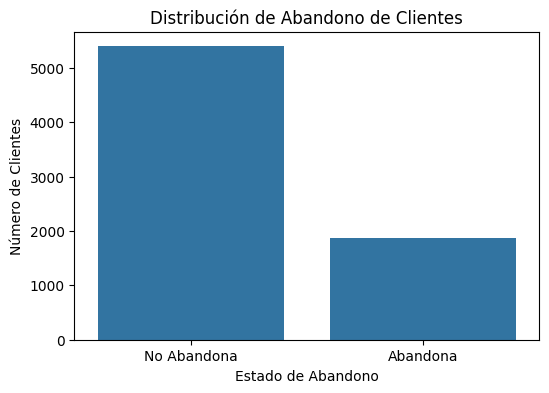

In [ ]:
# *Distribución de Churn*
import seaborn as sns
import matplotlib.pyplot as plt

# Ejemplo para la columna 'Churn' después de la conversión a 0/1

churn_labels = {0: 'No Abandona', 1: 'Abandona'}
df_telecom['Churn_Labels'] = df_telecom['Churn'].map(churn_labels)

plt.figure(figsize=(6, 4))
sns.countplot(data=df_telecom, x='Churn_Labels')
plt.title('Distribución de Abandono de Clientes')
plt.xlabel('Estado de Abandono')
plt.ylabel('Número de Clientes')
plt.show()


#📊 Carga y análisis

**Análisis Descriptivo**

In [ ]:
print("Análisis Descriptivo de Columnas Numéricas:")
print(df_telecom[['SeniorCitizen', 'tenure', 'Monthly', 'Total', 'Cuentas_Diarias']].describe())

Análisis Descriptivo de Columnas Numéricas:
       SeniorCitizen       tenure      Monthly        Total  Cuentas_Diarias
count    7267.000000  7267.000000  7267.000000  7267.000000      7267.000000
mean        0.162653    32.346498    64.720098  2277.182035         2.157337
std         0.369074    24.571773    30.129572  2268.648587         1.004319
min         0.000000     0.000000    18.250000     0.000000         0.608333
25%         0.000000     9.000000    35.425000   396.200000         1.180833
50%         0.000000    29.000000    70.300000  1389.200000         2.343333
75%         0.000000    55.000000    89.875000  3778.525000         2.995833
max         1.000000    72.000000   118.750000  8684.800000         3.958333


In [ ]:
print(f"\nMedia de 'tenure': {df_telecom['tenure'].mean():.2f}")
print(f"Media de 'Monthly': {df_telecom['Monthly'].mean():.2f}")


Media de 'tenure': 32.35
Media de 'Monthly': 64.72


In [ ]:
print(f"\nMediana de 'tenure': {df_telecom['tenure'].median():.2f}")
print(f"Mediana de 'Monthly': {df_telecom['Monthly'].median():.2f}")


Mediana de 'tenure': 29.00
Mediana de 'Monthly': 70.30


In [ ]:
print(f"\nDesviación Estándar de 'tenure': {df_telecom['tenure'].std():.2f}")
print(f"Desviación Estándar de 'Monthly': {df_telecom['Monthly'].std():.2f}")


Desviación Estándar de 'tenure': 24.57
Desviación Estándar de 'Monthly': 30.13


In [ ]:
print("Análisis Descriptivo de Columnas NO Numéricas:")
print("\nConteo de valores para 'Churn' (si el cliente dejó o no la empresa):")
print(df_telecom['Churn'].value_counts())
print("\nProporción de valores para 'Churn':")
print(df_telecom['Churn'].value_counts(normalize=True).mul(100).round(2).astype(str) + '%')

print("\nConteo de valores para 'gender' (indica el sexo del cliente):")
print(df_telecom['gender'].value_counts())
print("\nProporción de valores para 'gender':")
print(df_telecom['gender'].value_counts(normalize=True).mul(100).round(2).astype(str) + '%')

print("\nConteo de valores para 'Partner' (indica si el cliente tiene pareja)")
print(df_telecom['Partner'].value_counts())
print("\nProporción de valores para 'Partner':")
print(df_telecom['Partner'].value_counts(normalize=True).mul(100).round(2).astype(str) + '%')

print("\nConteo de valores para 'Dependents' ( indica si el cliente tiene dependientes)")
print(df_telecom['Dependents'].value_counts())
print("\nProporción de valores para 'Dependents':")
print(df_telecom['Dependents'].value_counts(normalize=True).mul(100).round(2).astype(str) + '%')

print("\nConteo de valores para 'PhoneService' ( indica si el cliente tiene servicio telefónico:")
print(df_telecom['PhoneService'].value_counts())
print("\nProporción de valores para 'PhoneService':")
print(df_telecom['PhoneService'].value_counts(normalize=True).mul(100).round(2).astype(str) + '%')


print("\nConteo de valores para 'PaperlessBilling'  (indica si el cliente utiliza facturación sin papel):")
print(df_telecom['PaperlessBilling'].value_counts())
print("\nProporción de valores para 'PaperlessBilling':")
print(df_telecom['PaperlessBilling'].value_counts(normalize=True).mul(100).round(2).astype(str) + '%')

Análisis Descriptivo de Columnas NO Numéricas:

Conteo de valores para 'Churn' (si el cliente dejó o no la empresa):
Churn
0    5398
1    1869
Name: count, dtype: int64

Proporción de valores para 'Churn':
Churn
0    74.28%
1    25.72%
Name: proportion, dtype: object

Conteo de valores para 'gender' (indica el sexo del cliente):
gender
1    3675
0    3592
Name: count, dtype: int64

Proporción de valores para 'gender':
gender
1    50.57%
0    49.43%
Name: proportion, dtype: object

Conteo de valores para 'Partner' (indica si el cliente tiene pareja)
Partner
0    3749
1    3518
Name: count, dtype: int64

Proporción de valores para 'Partner':
Partner
0    51.59%
1    48.41%
Name: proportion, dtype: object

Conteo de valores para 'Dependents' ( indica si el cliente tiene dependientes)
Dependents
0    5086
1    2181
Name: count, dtype: int64

Proporción de valores para 'Dependents':
Dependents
0    69.99%
1    30.01%
Name: proportion, dtype: object

Conteo de valores para 'PhoneService' ( i

**Recuento de evasión por variables categóricas**

In [ ]:
df_telecom.select_dtypes(include='object').columns

Index(['customerID', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaymentMethod', 'Churn_Labels'],
      dtype='object')

In [ ]:
# Lista de variables categóricas para analizar
categorical_cols = ['MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaymentMethod']

Explorando la distribución de evasión por variables categóricas:

--- Análisis para: MultipleLines ---
Churn                     1
MultipleLines              
Yes               27.732463
No                24.291845
No phone service  24.045262


<ipython-input-106-167943932>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_distribution.index, y=churn_distribution[1], palette='viridis') # Usamos una paleta de colores


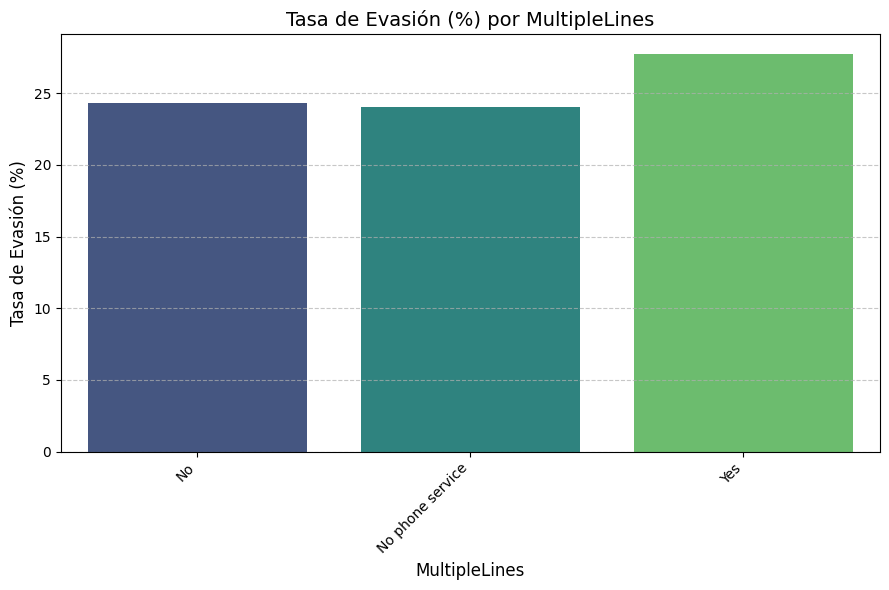



--- Análisis para: InternetService ---
Churn                    1
InternetService           
Fiber optic      40.556598
DSL              18.448553
No                7.147375


<ipython-input-106-167943932>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_distribution.index, y=churn_distribution[1], palette='viridis') # Usamos una paleta de colores


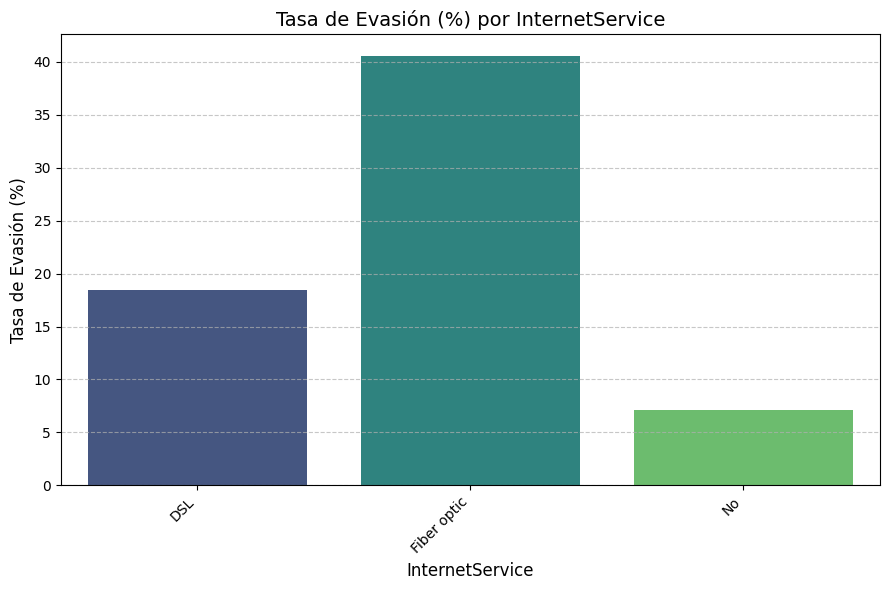

<ipython-input-106-167943932>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_distribution.index, y=churn_distribution[1], palette='viridis') # Usamos una paleta de colores




--- Análisis para: OnlineSecurity ---
Churn                        1
OnlineSecurity                
No                   40.493348
Yes                  14.196343
No internet service   7.147375


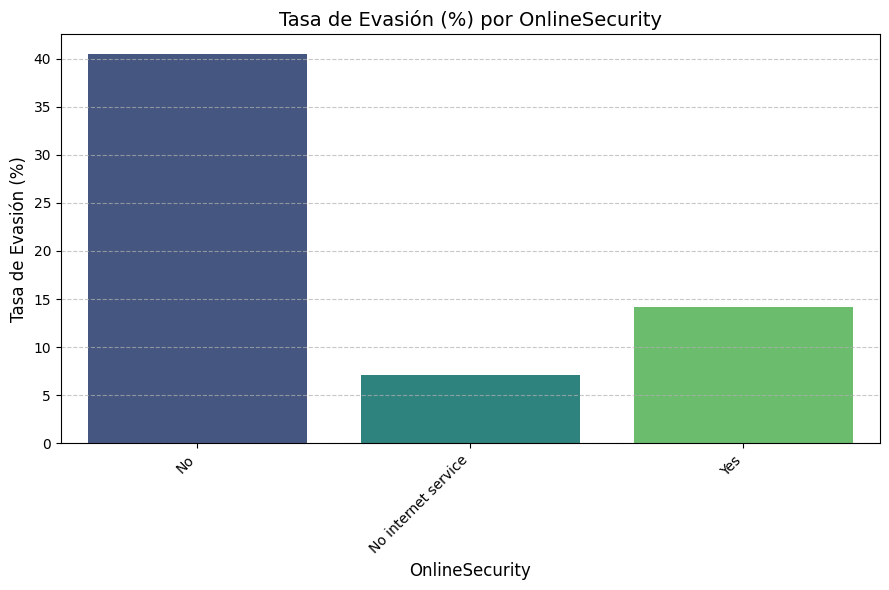



--- Análisis para: OnlineBackup ---
Churn                        1
OnlineBackup                  
No                   38.749214
Yes                  20.886581
No internet service   7.147375


<ipython-input-106-167943932>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_distribution.index, y=churn_distribution[1], palette='viridis') # Usamos una paleta de colores


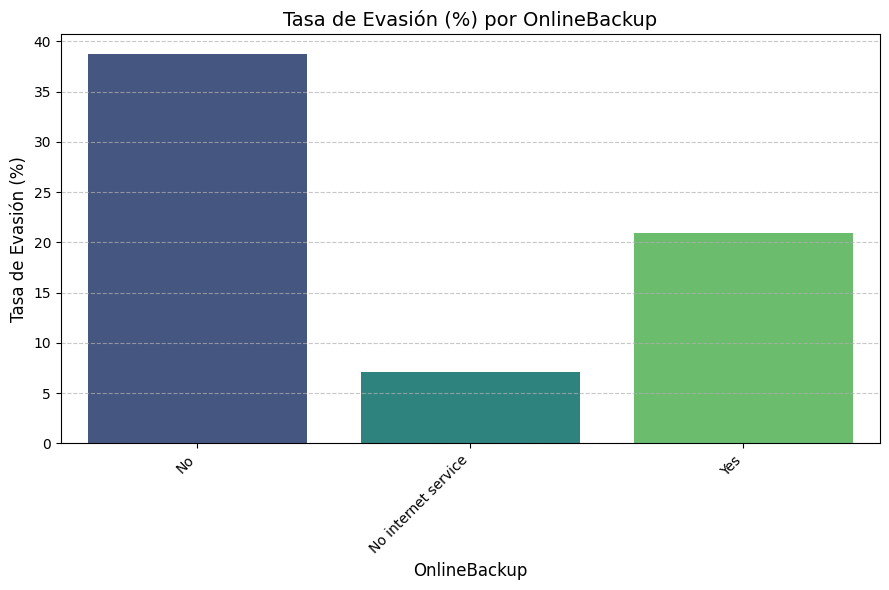

<ipython-input-106-167943932>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_distribution.index, y=churn_distribution[1], palette='viridis') # Usamos una paleta de colores




--- Análisis para: DeviceProtection ---
Churn                        1
DeviceProtection              
No                   37.902973
Yes                  21.878764
No internet service   7.147375


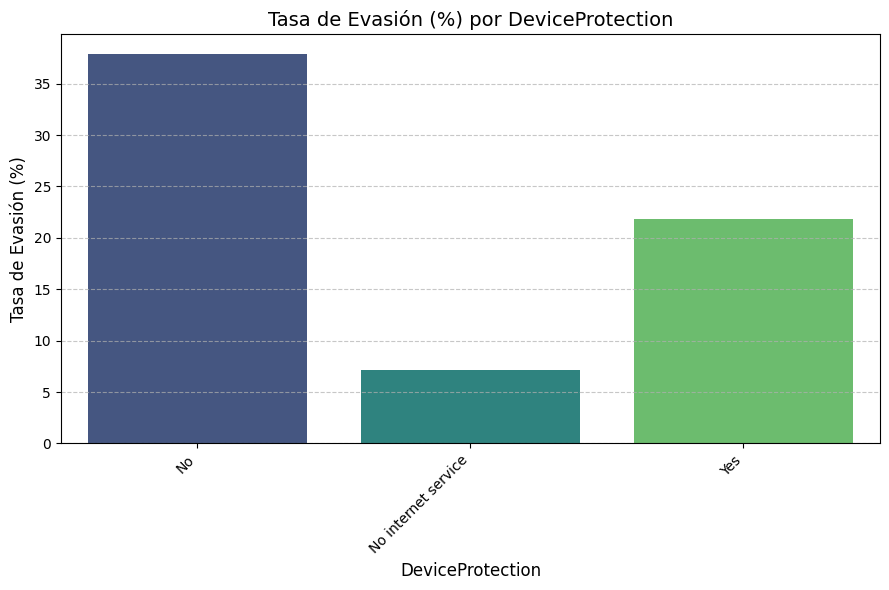



--- Análisis para: TechSupport ---
Churn                        1
TechSupport                   
No                   40.368509
Yes                  14.733840
No internet service   7.147375


<ipython-input-106-167943932>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_distribution.index, y=churn_distribution[1], palette='viridis') # Usamos una paleta de colores


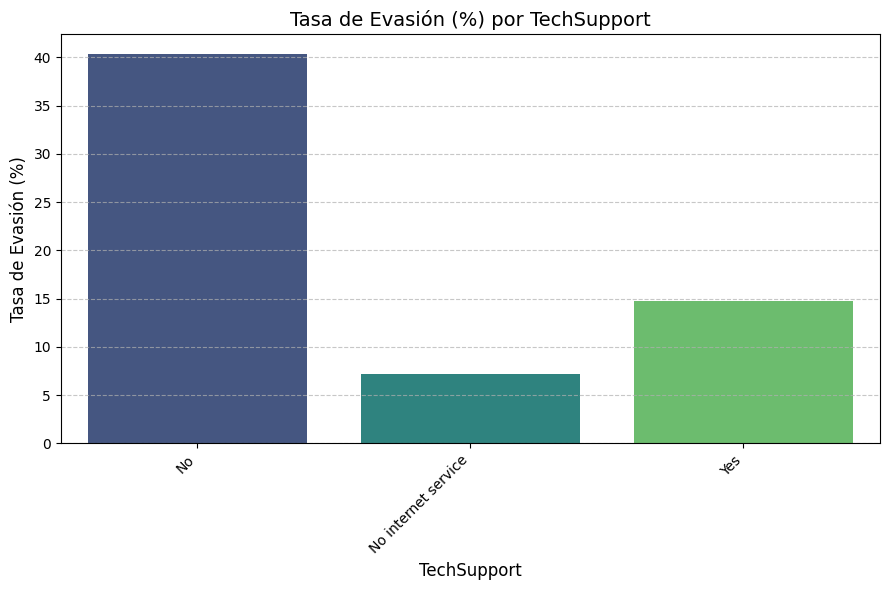



--- Análisis para: StreamingTV ---
Churn                        1
StreamingTV                   
No                   32.527624
Yes                  29.175627
No internet service   7.147375


<ipython-input-106-167943932>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_distribution.index, y=churn_distribution[1], palette='viridis') # Usamos una paleta de colores


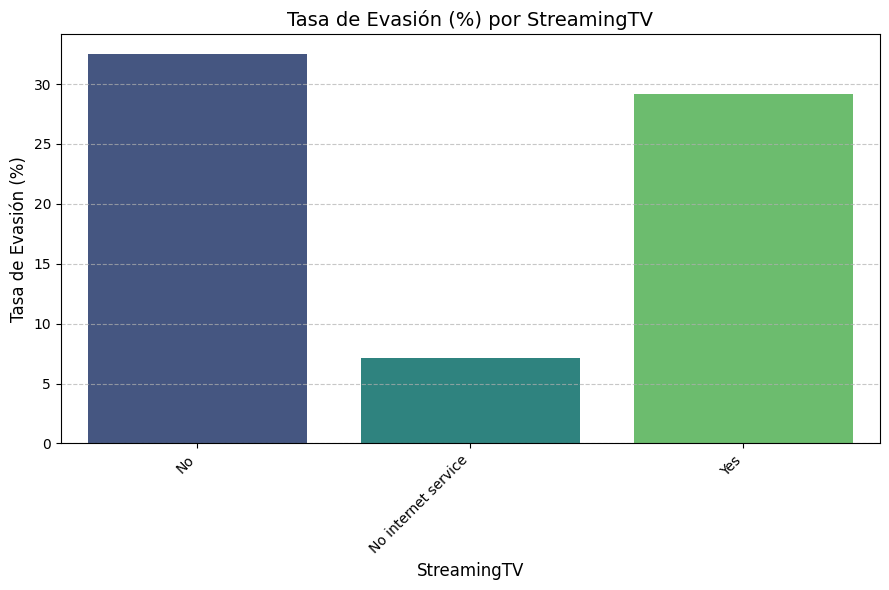



--- Análisis para: StreamingMovies ---
Churn                        1
StreamingMovies               
No                   32.682927
Yes                  29.048295
No internet service   7.147375


<ipython-input-106-167943932>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_distribution.index, y=churn_distribution[1], palette='viridis') # Usamos una paleta de colores


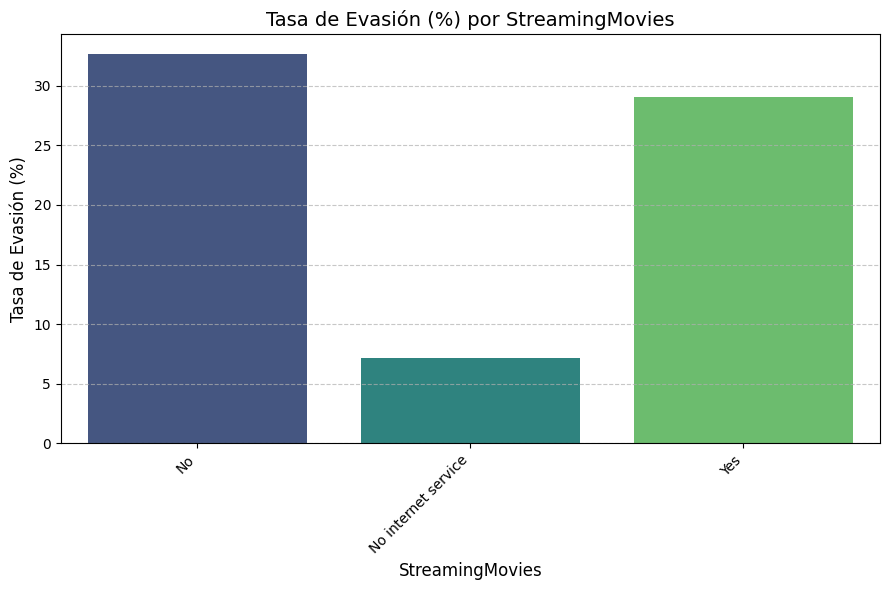

<ipython-input-106-167943932>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_distribution.index, y=churn_distribution[1], palette='viridis') # Usamos una paleta de colores




--- Análisis para: Contract ---
Churn                   1
Contract                 
Month-to-month  41.323346
One year        10.928242
Two year         2.753873


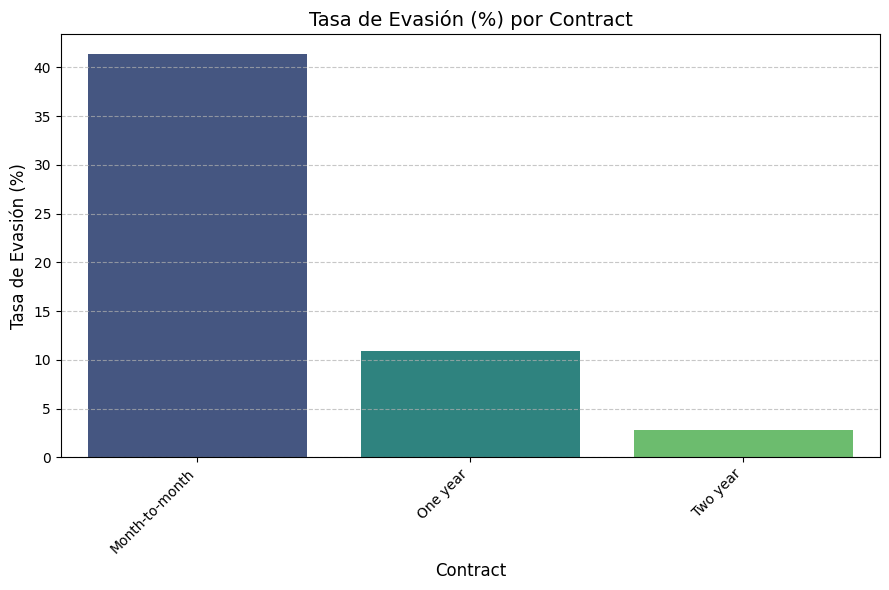



--- Análisis para: PaymentMethod ---
Churn                              1
PaymentMethod                       
Electronic check           43.803681
Mailed check               18.498498
Bank transfer (automatic)  16.236627
Credit card (automatic)    14.795918


<ipython-input-106-167943932>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_distribution.index, y=churn_distribution[1], palette='viridis') # Usamos una paleta de colores


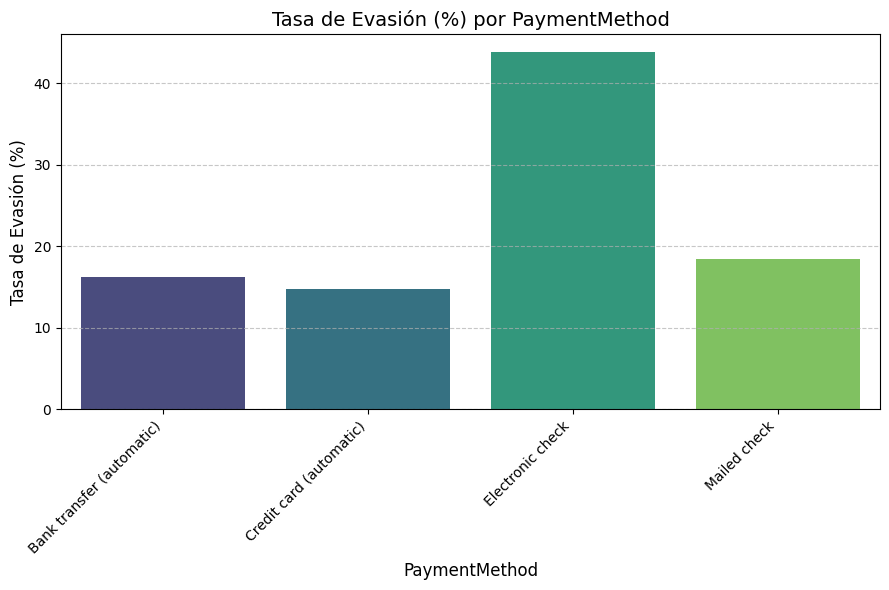

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print("Explorando la distribución de evasión por variables categóricas:\n")

for col in categorical_cols:
    print(f"--- Análisis para: {col} ---")
    churn_distribution = pd.crosstab(df_telecom[col], df_telecom['Churn'], normalize='index') * 100
    # Imprimir la tabla de distribución de Churn (columna '1')
    # Ordena de mayor a menor tasa de evasión para una mejor comprensión
    print(churn_distribution[[1]].sort_values(by=1, ascending=False))

    # Visualización con un gráfico de barras
    plt.figure(figsize=(9, 6))
    sns.barplot(x=churn_distribution.index, y=churn_distribution[1], palette='viridis')
    plt.title(f'Tasa de Evasión (%) por {col}', fontsize=14)
    plt.ylabel('Tasa de Evasión (%)', fontsize=12)
    plt.xlabel(col, fontsize=12)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.yticks(fontsize=10)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

    print("\n" + "="*60 + "\n") # Separador más largo para mayor claridad

*Evasion según metodo de pago*

--- Análisis para: PaymentMethod ---
Tasa de Evasión (%) por Método de Pago:
Churn                              1
PaymentMethod                       
Electronic check           43.803681
Mailed check               18.498498
Bank transfer (automatic)  16.236627
Credit card (automatic)    14.795918


<ipython-input-107-3937569909>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_distribution.index, y=churn_distribution[1], palette='plasma')


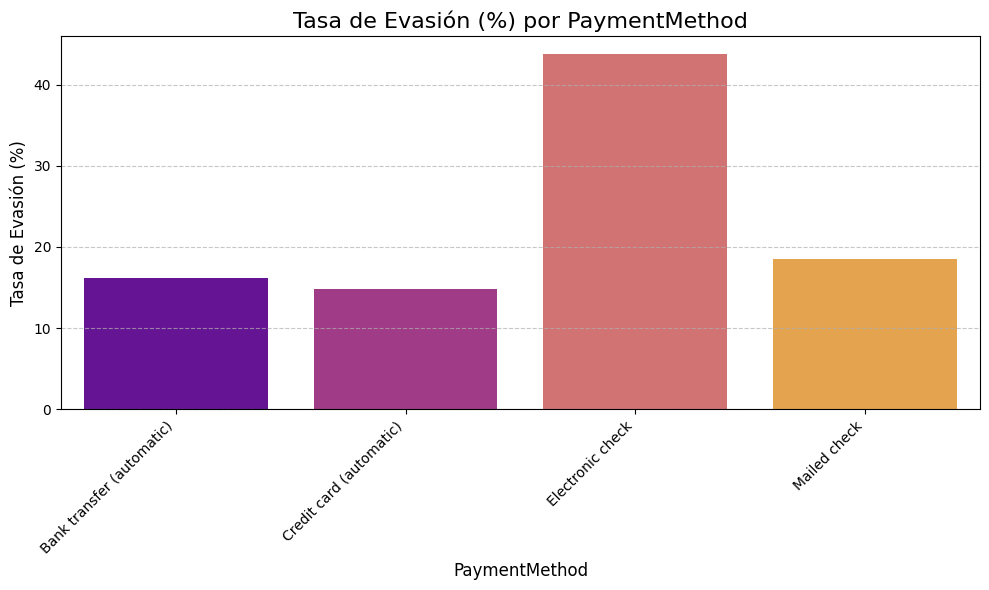

In [ ]:
col_to_analyze = 'PaymentMethod'

print(f"--- Análisis para: {col_to_analyze} ---")
churn_distribution = pd.crosstab(df_telecom[col_to_analyze], df_telecom['Churn'], normalize='index') * 100

print("Tasa de Evasión (%) por Método de Pago:")
print(churn_distribution[[1]].sort_values(by=1, ascending=False))

# Visualización con un gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=churn_distribution.index, y=churn_distribution[1], palette='plasma')
plt.title(f'Tasa de Evasión (%) por {col_to_analyze}', fontsize=16)
plt.ylabel('Tasa de Evasión (%)', fontsize=12)
plt.xlabel(col_to_analyze, fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print("\n" + "="*60 + "\n")

In [ ]:
churn_distribution[[1]].sort_values(by=1, ascending=False)

Churn,1
PaymentMethod,
Electronic check,43.803681
Mailed check,18.498498
Bank transfer (automatic),16.236627
Credit card (automatic),14.795918


*Evasion según contrato*

--- Análisis para: Contract ---
Tasa de Evasión (%) por Tipo de Contrato:
Churn                   1
Contract                 
Month-to-month  41.323346
One year        10.928242
Two year         2.753873


<ipython-input-109-2872461536>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_distribution.index, y=churn_distribution[1], palette='magma')


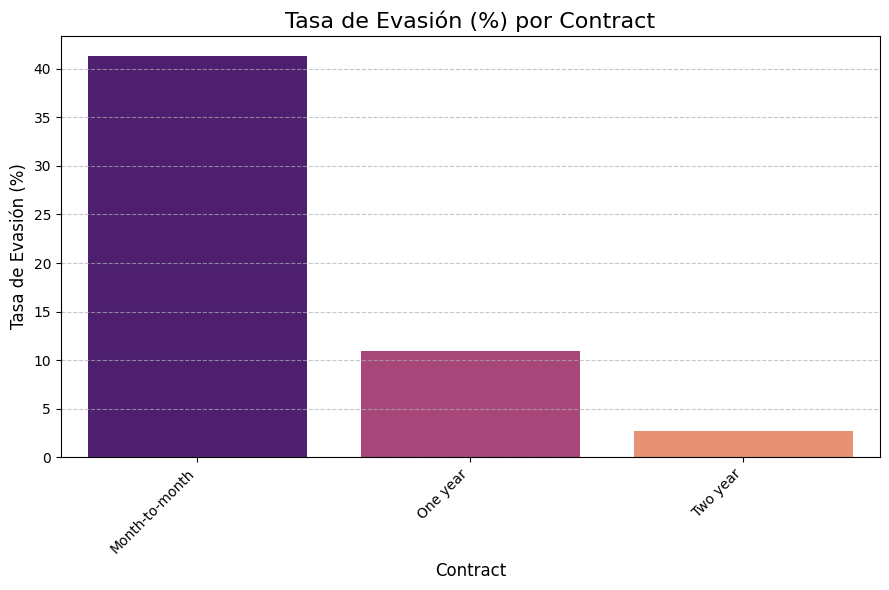

In [ ]:
col_to_analyze = 'Contract'

print(f"--- Análisis para: {col_to_analyze} ---")

churn_distribution = pd.crosstab(df_telecom[col_to_analyze], df_telecom['Churn'], normalize='index') * 100

print("Tasa de Evasión (%) por Tipo de Contrato:")
print(churn_distribution[[1]].sort_values(by=1, ascending=False))

plt.figure(figsize=(9, 6))
sns.barplot(x=churn_distribution.index, y=churn_distribution[1], palette='magma')

plt.title(f'Tasa de Evasión (%) por {col_to_analyze}', fontsize=16)
plt.ylabel('Tasa de Evasión (%)', fontsize=12)
plt.xlabel(col_to_analyze, fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print("\n" + "="*60 + "\n")

*Evasion según genero*

--- Análisis para: gender ---
Tasa de Evasión (%) por Género:
Churn              1
gender              
Femenino   26.141425
Masculino  25.306122


<ipython-input-110-4189251857>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_distribution.index, y=churn_distribution[1], palette='viridis') # Otra paleta de colores


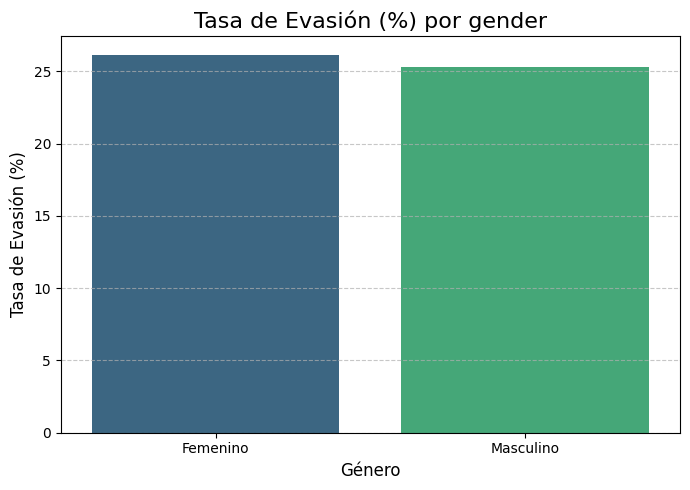

In [ ]:
col_to_analyze = 'gender'

print(f"--- Análisis para: {col_to_analyze} ---")
churn_distribution = pd.crosstab(df_telecom[col_to_analyze], df_telecom['Churn'], normalize='index') * 100
churn_distribution = churn_distribution.rename(index={0: 'Femenino', 1: 'Masculino'})

print("Tasa de Evasión (%) por Género:")
print(churn_distribution[[1]].sort_values(by=1, ascending=False))

# Visualización con un gráfico de barras
plt.figure(figsize=(7, 5))
sns.barplot(x=churn_distribution.index, y=churn_distribution[1], palette='viridis') # Otra paleta de colores

plt.title(f'Tasa de Evasión (%) por {col_to_analyze}', fontsize=16)
plt.ylabel('Tasa de Evasión (%)', fontsize=12)
plt.xlabel('Género', fontsize=12)
plt.xticks(rotation=0, ha='center', fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print("\n" + "="*60 + "\n")

Evasion según InternetService

--- Análisis para: InternetService ---
Tasa de Evasión (%) por Tipo de Servicio de Internet:
Churn                    1
InternetService           
Fiber optic      40.556598
DSL              18.448553
No                7.147375


<ipython-input-111-1849960255>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_distribution.index, y=churn_distribution[1], palette='crest') # Otra paleta de colores


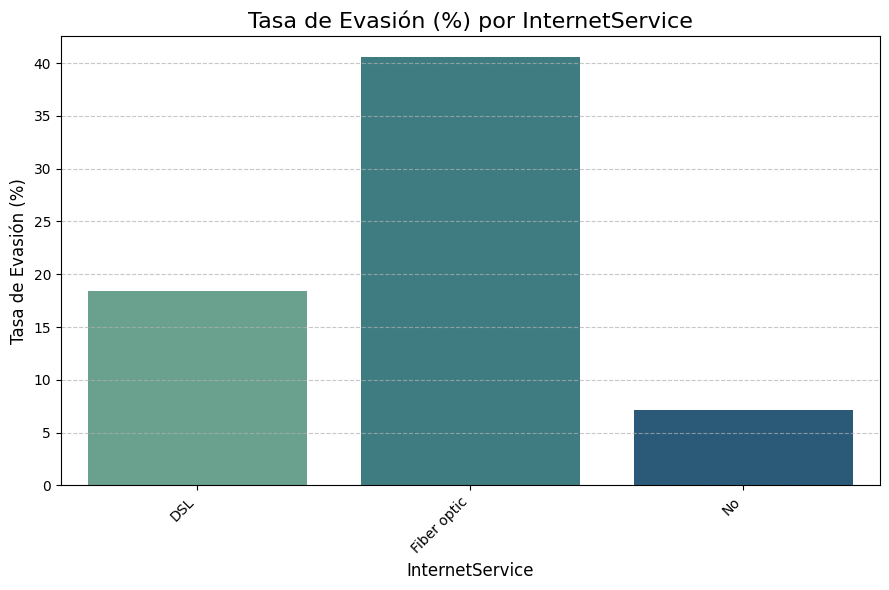

In [ ]:
col_to_analyze = 'InternetService'

print(f"--- Análisis para: {col_to_analyze} ---")

churn_distribution = pd.crosstab(df_telecom[col_to_analyze], df_telecom['Churn'], normalize='index') * 100

print("Tasa de Evasión (%) por Tipo de Servicio de Internet:")
print(churn_distribution[[1]].sort_values(by=1, ascending=False))

# Visualización con un gráfico de barras
plt.figure(figsize=(9, 6))
sns.barplot(x=churn_distribution.index, y=churn_distribution[1], palette='crest') # Otra paleta de colores

plt.title(f'Tasa de Evasión (%) por {col_to_analyze}', fontsize=16)
plt.ylabel('Tasa de Evasión (%)', fontsize=12)
plt.xlabel(col_to_analyze, fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print("\n" + "="*60 + "\n")

Evasion según TechSupport

--- Análisis para: TechSupport ---
Tasa de Evasión (%) por Soporte Técnico:
Churn                        1
TechSupport                   
No                   40.368509
Yes                  14.733840
No internet service   7.147375


<ipython-input-112-2494503005>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_distribution.index, y=churn_distribution[1], palette='rocket') # Otra paleta de colores


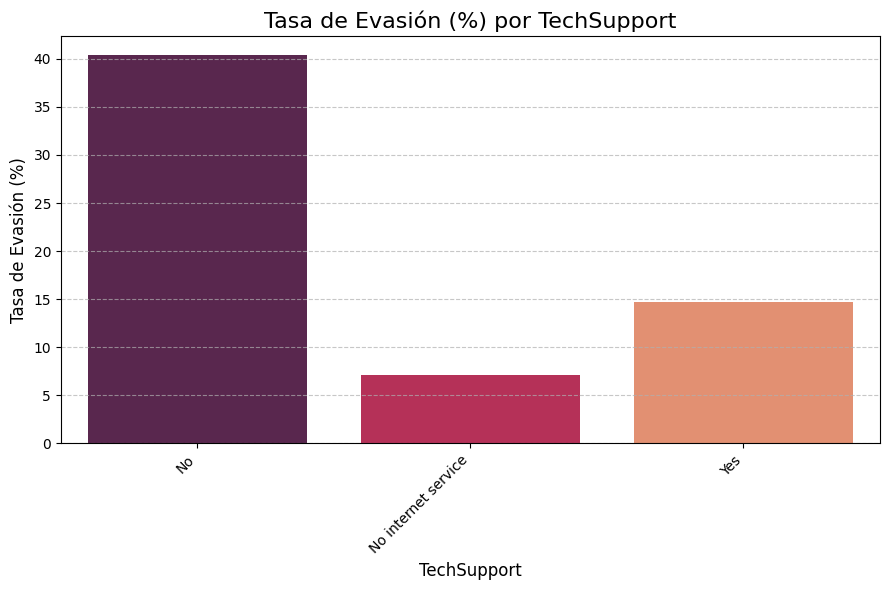

In [ ]:
col_to_analyze = 'TechSupport'

print(f"--- Análisis para: {col_to_analyze} ---")

churn_distribution = pd.crosstab(df_telecom[col_to_analyze], df_telecom['Churn'], normalize='index') * 100

print("Tasa de Evasión (%) por Soporte Técnico:")
print(churn_distribution[[1]].sort_values(by=1, ascending=False))

# Visualización con un gráfico de barras
plt.figure(figsize=(9, 6))
sns.barplot(x=churn_distribution.index, y=churn_distribution[1], palette='rocket') # Otra paleta de colores

plt.title(f'Tasa de Evasión (%) por {col_to_analyze}', fontsize=16)
plt.ylabel('Tasa de Evasión (%)', fontsize=12)
plt.xlabel(col_to_analyze, fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
df_telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   int64  
 2   gender            7267 non-null   int64  
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   int64  
 5   Dependents        7267 non-null   int64  
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   int64  
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


*Conteo de evasión por variables numéricas*

Explorando la distribución de variables numéricas entre clientes que evadieron y los que no:

--- Análisis para: Total ---


<ipython-input-116-2296366465>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_telecom, x='Churn', y=col, palette='viridis')


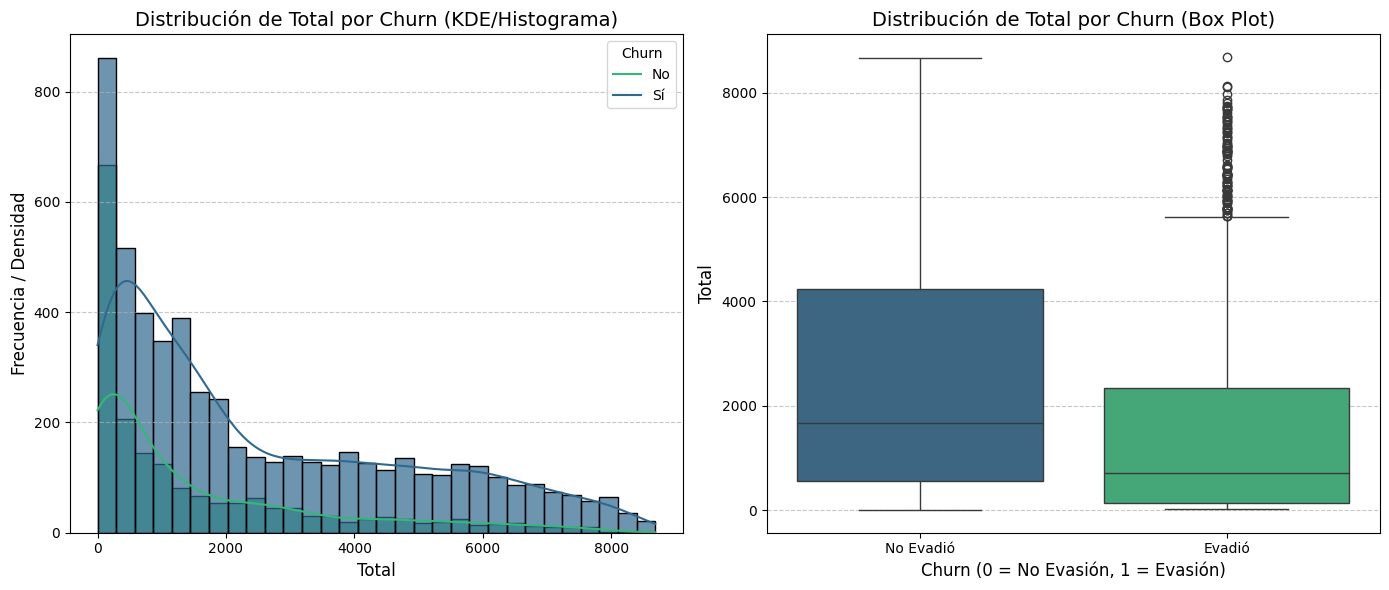


Estadísticas descriptivas de 'Total' por grupo de Churn:
        count         mean          std    min       25%       50%       75%  \
Churn                                                                          
0      5398.0  2535.263977  2330.802193   0.00  564.3625  1663.625  4237.275   
1      1869.0  1531.796094  1890.822994  18.85  134.5000   703.550  2331.300   

           max  
Churn           
0      8672.45  
1      8684.80  


--- Análisis para: tenure ---


<ipython-input-116-2296366465>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_telecom, x='Churn', y=col, palette='viridis')


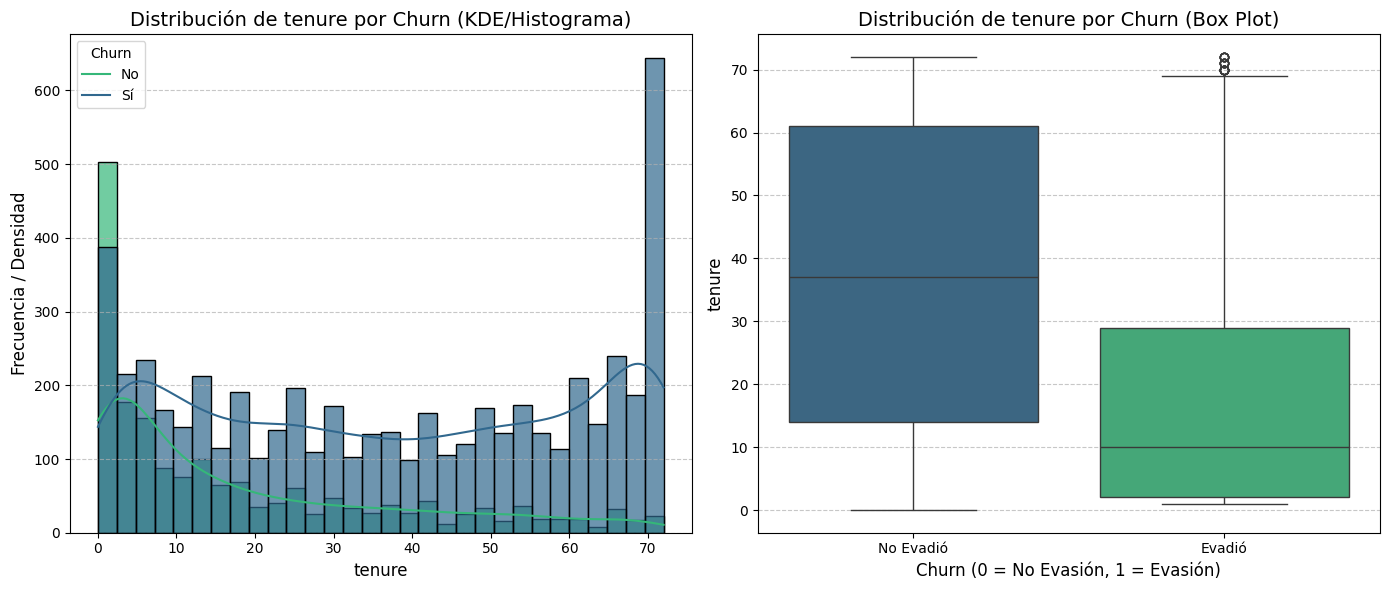


Estadísticas descriptivas de 'tenure' por grupo de Churn:
        count       mean        std  min   25%   50%   75%   max
Churn                                                           
0      5398.0  37.321045  24.178367  0.0  14.0  37.0  61.0  72.0
1      1869.0  17.979133  19.531123  1.0   2.0  10.0  29.0  72.0




In [ ]:
numeric_cols = ['Total', 'tenure']

print("Explorando la distribución de variables numéricas entre clientes que evadieron y los que no:\n")

for col in numeric_cols:
    print(f"--- Análisis para: {col} ---")

    # Crear una figura con dos subplots
    plt.figure(figsize=(14, 6))

    # Subplot 1: Histograma/Gráfico de Densidad (KDE)
    plt.subplot(1, 2, 1) # 1 fila, 2 columnas, primer gráfico
    sns.histplot(data=df_telecom, x=col, hue='Churn', kde=True, palette='viridis', alpha=0.7, bins=30)
    plt.title(f'Distribución de {col} por Churn (KDE/Histograma)', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Frecuencia / Densidad', fontsize=12)
    plt.legend(title='Churn', labels=['No', 'Sí'])
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Subplot 2: Diagrama de Caja (Box Plot)
    plt.subplot(1, 2, 2) # 1 fila, 2 columnas, segundo gráfico
    sns.boxplot(data=df_telecom, x='Churn', y=col, palette='viridis')
    plt.title(f'Distribución de {col} por Churn (Box Plot)', fontsize=14)
    plt.xlabel('Churn (0 = No Evasión, 1 = Evasión)', fontsize=12)
    plt.ylabel(col, fontsize=12)
    plt.xticks(ticks=[0, 1], labels=['No Evadió', 'Evadió'], fontsize=10)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()

    print(f"\nEstadísticas descriptivas de '{col}' por grupo de Churn:")
    print(df_telecom.groupby('Churn')[col].describe())

    print("\n" + "="*60 + "\n")

#📄Informe final

#Introducción

La evasión de clientes, comúnmente conocida como &quot;Churn&quot;, representa un desafío
significativo para las empresas de telecomunicaciones. La pérdida de clientes no solo
implica una disminución directa de los ingresos, sino que también puede ser más
costosa que la adquisición de nuevos clientes.
El objetivo de este informe es explorar y comprender los factores que influyen en la
decisión de los clientes de evadir los servicios de la empresa de telecomunicaciones
(df_telecom). A través de este análisis de datos exhaustivo, se busca identificar
patrones y tendencias clave que permitan desarrollar estrategias de retención de
clientes más efectivas.

# Limpieza y Tratamiento de Datos

Antes de realizar cualquier análisis, fue fundamental preparar y limpiar los datos. Los
pasos principales incluyeron:

*   **Importación de Datos**
Se importó el conjunto de datos df_telecom utilizando
la librería Pandas.
*   **Identificación de Variables**
Se identificaron las variables categóricas y
numéricas relevantes para el análisis de evasión.
*   **Tratamiento de TotalCharges**:
La columna TotalCharges (Total Gastado) se
encontró inicialmente como un tipo de dato object (cadena de texto) y se
detectaron valores en blanco que representaban clientes nuevos sin cargos.
Estos valores fueron reemplazados por NaN y posteriormente se imputaron con
0 para permitir la conversión a un tipo de dato numérico (float).
*   **Recodificación de gender**:
La variable gender (género) se recodificó a valores
numéricos 0 y 1 para facilitar el análisis, donde 0 representa Femenino y 1
representa Masculino.
*   **Recodificación de Churn**:
Se recodificó a valores numéricos 0 y 1 la variable objetivo Churn (Evasión) 0 (No Evade) y 1 (Evade), lo cual es ideal para este tipo de análisis.

# Análisis Exploratorio de Datos

Se realizaron análisis exploratorios detallados para entender la distribución de la
evasión en relación con diversas variables.

1.    Análisis de Variables Categóricas
Se examinó la tasa de evasión para varias variables categóricas. Aquí se destacan las
más relevantes:

*   PaymentMethod (Método de Pago):
Hallazgo: Los métodos de pago no electrónicos (ej. &quot;Transferencia
bancaria (automática)&quot;) mostraron tasas de evasión generalmente más
bajas que los electrónicos (ej. &quot;Cheque electrónico&quot;).

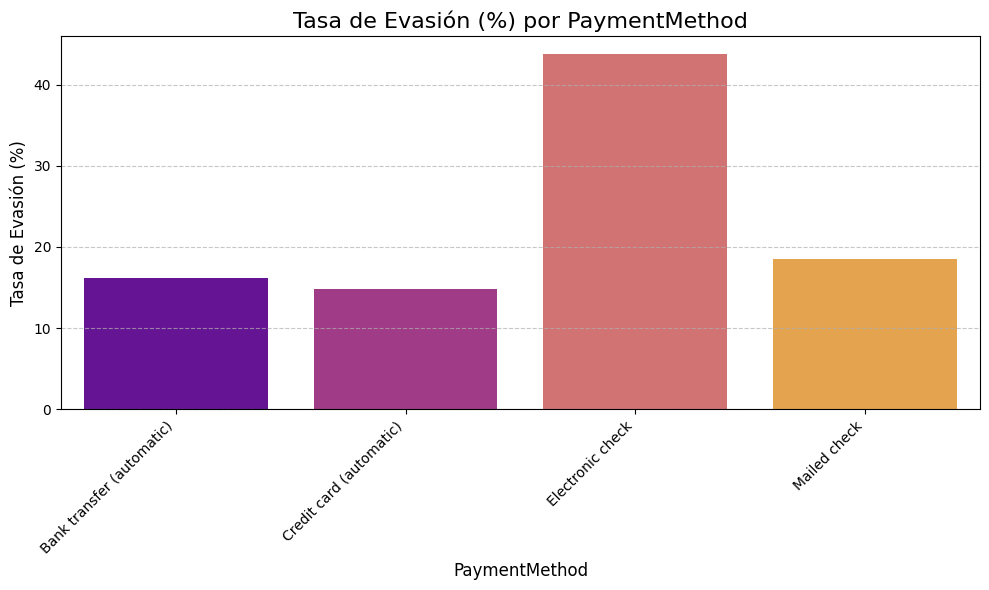

*   Contract (Tipo de Contrato):
Hallazgo: Se observó una correlación muy fuerte. Los clientes con
contratos &quot;Mes a mes&quot; presentaron una tasa de evasión
significativamente más alta en comparación con aquellos con contratos
a &quot;Un año&quot; o &quot;Dos años&quot;.

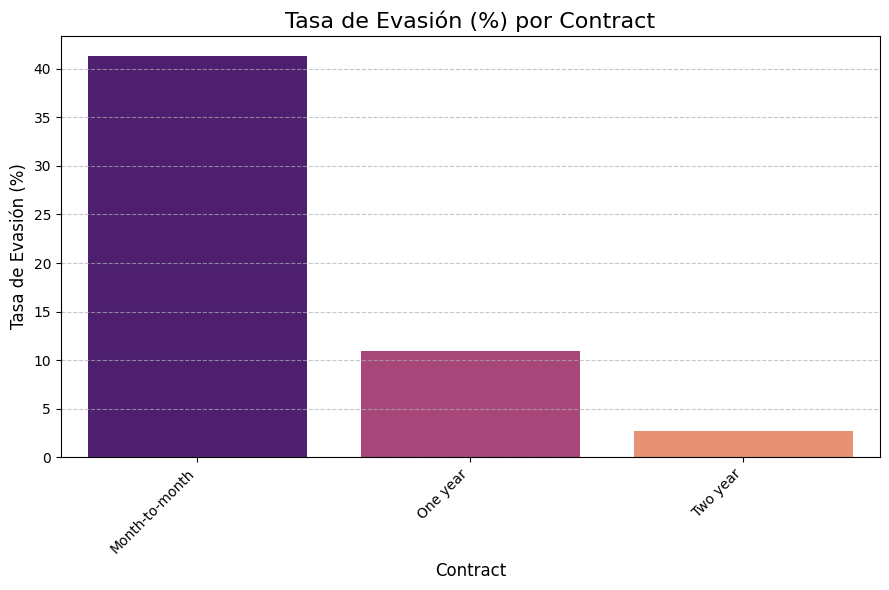

*   gender (Género):
Hallazgo: La tasa de evasión entre clientes masculinos y femeninos fue
muy similar, indicando que el género no es un factor diferenciador
importante en la decisión de evadir el servicio.

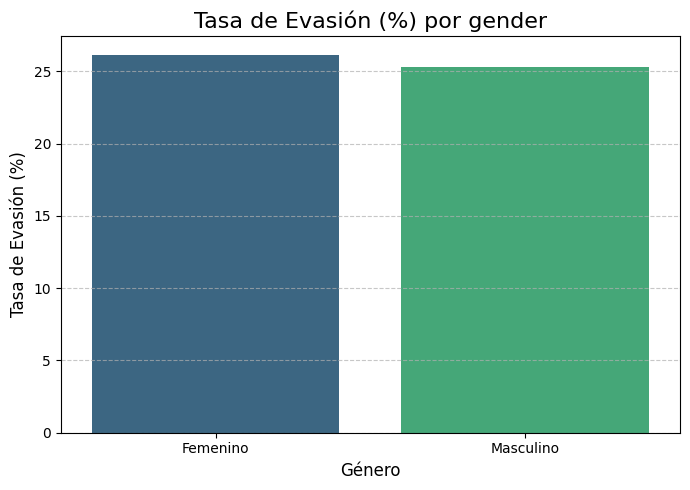

*   InternetService (Servicio de Internet):
Hallazgo: se revela que el tipo de servicio de internet está fuertemente correlacionado con la tasa de evasión, destacando la fibra óptica como el área de mayor preocupación.  Esto podría deberse a varios factores, como problemas con la calidad del servicio, precios percibidos como altos, o incluso una mayor rotación de clientes en este segmento

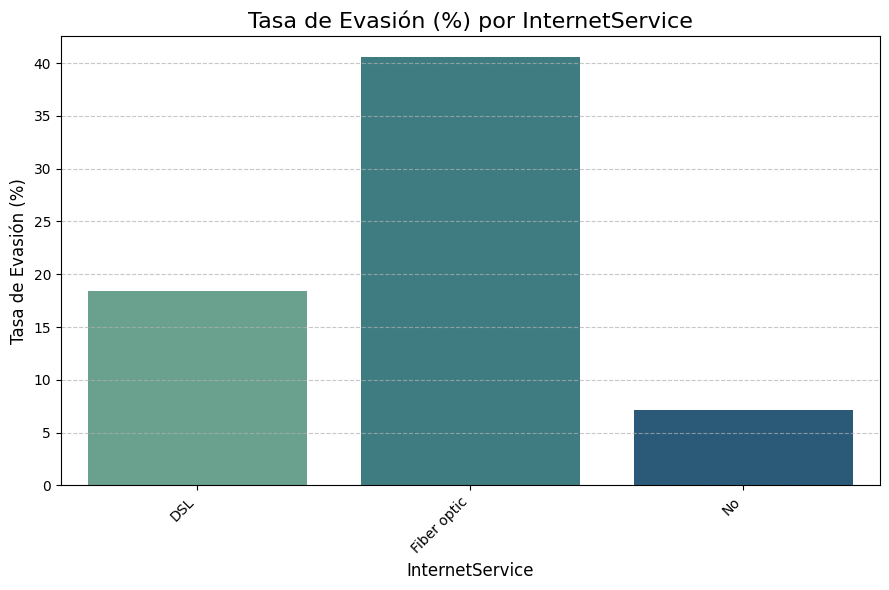

*   TechSupport (Soporte Técnico):Hallazgo: Los clientes que no contrataron o no tuvieron acceso a
soporte técnico mostraron una tasa de evasión notablemente superior a
aquellos que sí contaron con este servicio.

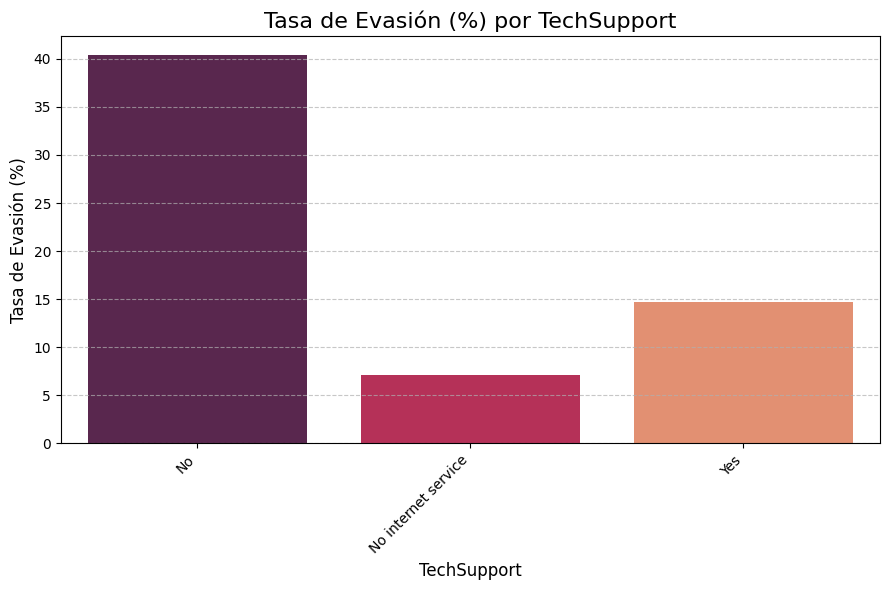

2.    Análisis de Variables Numéricas:
Se examinó la distribución de variables numéricas entre los grupos de clientes que
evadieron y los que no.

*   Total (Total Gastado) Hallazgo: Los clientes que evaden (&quot;Sí&quot; Churn) tienen un Total gastado
significativamente menor en comparación con los clientes que no evaden (&quot;No&quot; Churn). La mediana para clientes que no evadieron fue de 1663.62, mientras que para los que sí evadieron fue de 703.55.

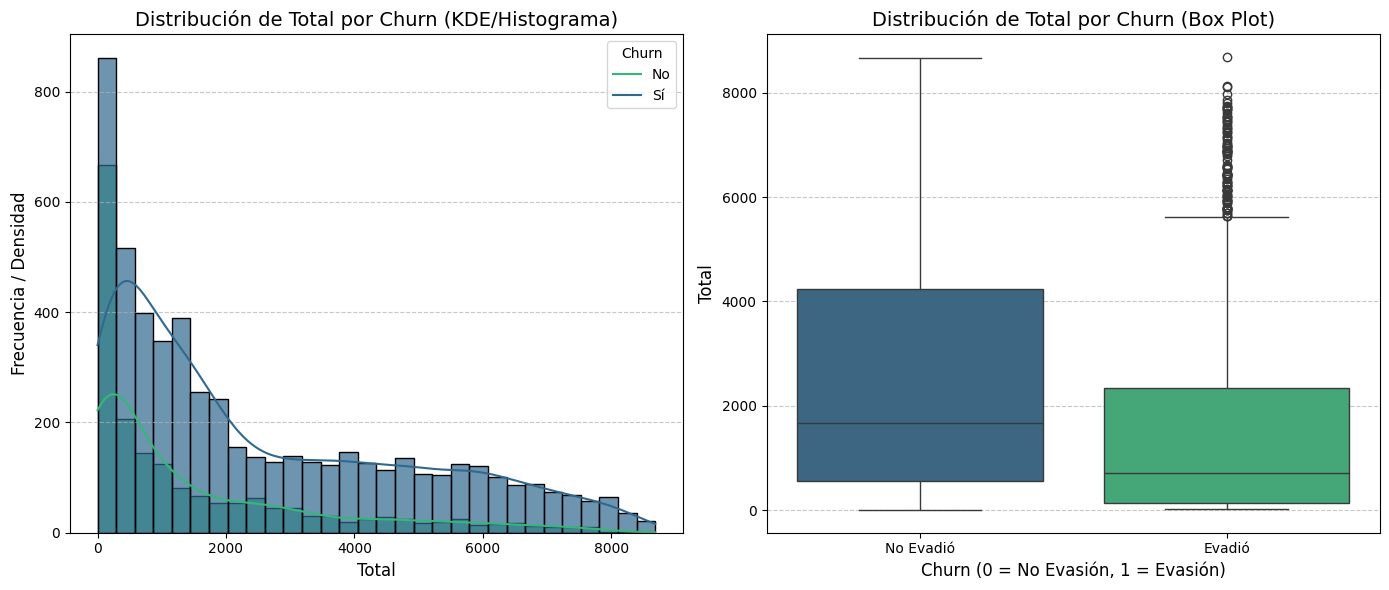


*   tenure (Tiempo de Contrato / Antigüedad) Hallazgo: La antigüedad del cliente es un predictor extremadamente fuerte. Los clientes que evaden tienen una tenure (antigüedad)promedio y mediana considerablemente más baja que los clientes que
permanecen. La mediana para clientes que no evadieron fue de 37 meses, mientras que para los que sí evadieron fue de 10 meses.

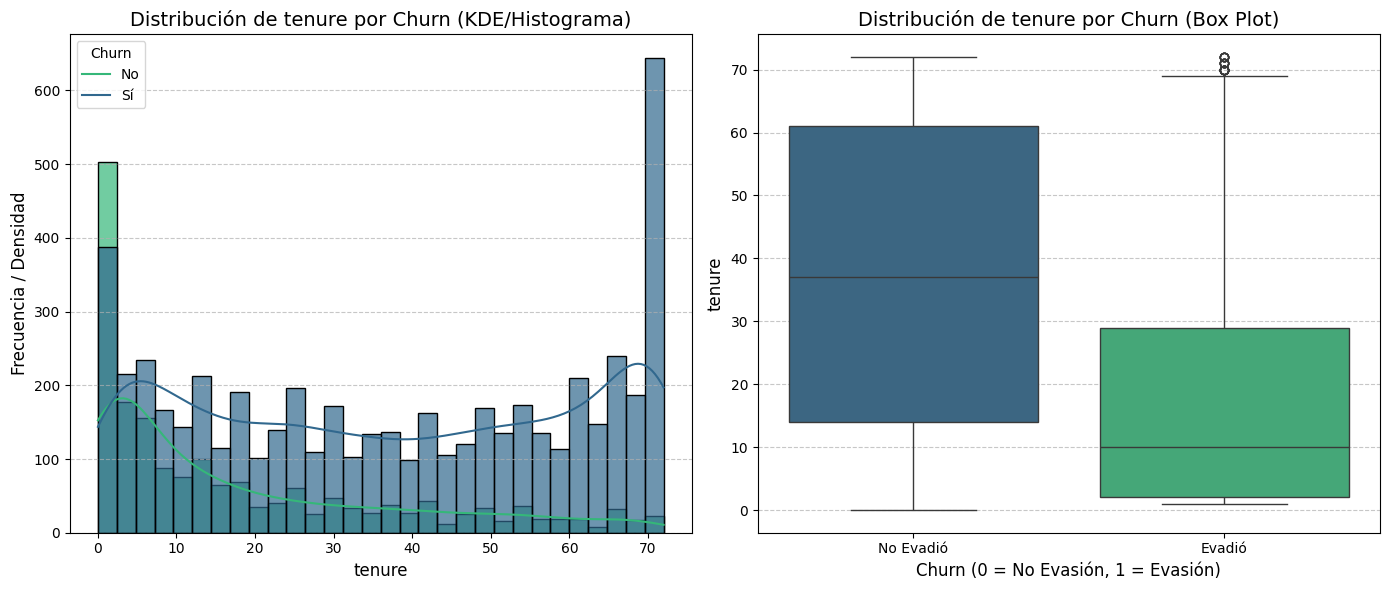



# Conclusiones e Insights

Los análisis realizados revelan patrones claros y accionables para comprender y
potencialmente reducir la evasión de clientes:
**Vulnerabilidad Temprana:** Los clientes con menor antigüedad (tenure baja) y, consecuentemente, un menor gasto total (Total bajo), son el grupo de mayor
riesgo de evasión. Esto indica que la fase inicial de la relación con el cliente es crítica.
**Compromiso Contractual:** Los contratos de &quot;Mes a mes&quot; son un factor de riesgo importante. La falta de compromiso a largo plazo facilita la evasión.
**Importancia del Soporte:** La disponibilidad de TechSupport está asociado con menores tasas de evasión, sugiriendo que la calidad del servicio y la capacidad de resolver problemas técnicos son cruciales para la retención.
**Métodos de Pago:** Ciertos métodos de pago pueden generar fricción y contribuir a la evasión, aunque este factor puede ser menos influyente que el
contrato o la antigüedad.
**Género Irrelevante:** El género del cliente no parece ser un factor determinante en la evasión.

*Estos insights permiten a la empresa centrar sus esfuerzos de retención en los segmentos de clientes más vulnerables y en los aspectos del servicio que tienen un mayor impacto en la lealtad del cliente.*

#  Recomendaciones

Basado en los hallazgos de este análisis, se proponen las siguientes recomendaciones estratégicas para reducir la evasión de clientes:
1.	Programas de Inducción y Retención Temprana:
Objetivo: Reducir la evasión en los primeros meses.
Acciones: Implementar un programa de "bienvenida" robusto para clientes nuevos, con seguimientos proactivos (llamadas, emails) para asegurar la satisfacción inicial, resolver dudas y ofrecer soporte. Considerar ofertas especiales para los primeros 3-6 meses que incentiven la permanencia.
2.	Incentivos para Contratos a Largo Plazo:
Objetivo: Fomentar la migración de clientes de "Mes a mes" a contratos de mayor duración.
Acciones: Ofrecer descuentos atractivos, servicios adicionales gratuitos (ej., un mes de StreamingTV gratis), o mejoras en el servicio (InternetService de mayor velocidad) a cambio de firmar un contrato anual o bianual. Comunicar claramente los beneficios de los contratos más largos.
3.	Reforzar la Oferta de Soporte Técnico:
Objetivo: Mejorar la satisfacción del cliente a través de un soporte eficiente.
Acciones: Promocionar activamente el servicio de TechSupport entre los clientes que no lo tienen. Evaluar la calidad y la eficiencia del soporte actual para garantizar que los clientes que lo utilizan tengan una experiencia positiva. Considerar incluir un nivel básico de soporte en todos los paquetes.
4.	Optimización de la Experiencia del Servicio de Internet:
Objetivo: Reducir la evasión relacionada con la calidad del servicio de internet.
Acciones: Investigar las razones específicas de la evasión (velocidad, fiabilidad).
5.	Revisión de Métodos de Pago Electrónicos:
Objetivo: Minimizar la fricción en el proceso de pago.
Acciones: Si el "Cheque electrónico" u otros métodos electrónicos tienen una tasa de evasión notablemente alta, investigar posibles problemas en la plataforma (errores de procesamiento, complejidad, seguridad percibida). Mejorar la interfaz de usuario y la fiabilidad de estos sistemas
